### Calibration evaluation of Epstemic and Aleatoric Uncertainty
In this notebook, we will:
1. Perform anomaly detection based our uatsad and calculate the calibration curve on diferent dataset
2. Visualize the result in `script/run.sh`

In [1]:
%load_ext autoreload
%autoreload 2

- SMAP(P-1)

In [3]:
import os
print(os.getcwd())
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

test_data = np.load('../datasets/SMAP/P-1_test.npy')
train_data = np.load('../datasets/SMAP/P-1_train.npy')

training = train_data[:, 0].reshape(-1, 1)
test = test_data[2000: 5000, 0].reshape(-1, 1)
valid = test_data[: 2000, 0].reshape(-1, 1)


scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)
# print(f"raw shape: {readings.shape}")
print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")

anomaly_index = [[150, 350], [1550, 1750], [2550, 2850]] # SMAP-P1



/media/xl/xule/UATSAD/src
training shape: (2872, 1)
test shape: (3000, 1)
valid shape: (2000, 1)


- SMAP(E-1)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_data = np.load('../datasets/SMAP/E-1.npy')

readings = raw_data[0: 6500, 0]
idx_split = [0, 3500, 4500]
training = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
valid = readings[idx_split[1]: idx_split[2]].reshape(-1,1)
test = readings[idx_split[2]: ].reshape(-1,1)

# labels (500, 530, ) (1100, 1500)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)
print(f"raw shape: {raw_data.shape}")
print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")
# print(f"lables shape: {lables.shape}")

anomaly_index = [(500, 535), (1100, 1500)]  # SMAP-E1


/media/xl/xule/UATSAD/src
raw shape: (8516, 25)
training shape: (3500, 1)
test shape: (2000, 1)
valid shape: (1000, 1)


- SMAP(E-13)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_data = np.load('../datasets/SMAP/E-13.npy')

readings = raw_data[0: 7000, 0]
idx_split = [0, 4000, 5000]
training = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
valid = readings[idx_split[1]: idx_split[2]].reshape(-1,1)
test = readings[idx_split[2]: ].reshape(-1,1)

# labels (300, 400) (600, 650) (1450, 1550)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)
print(f"raw shape: {raw_data.shape}")
print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")
# print(f"lables shape: {lables.shape}")

anomaly_index = [(300, 400), (600, 650), (1450, 1550)] # SMAP-E13


/media/xl/xule/UATSAD/src
raw shape: (8640, 25)
training shape: (4000, 1)
test shape: (2000, 1)
valid shape: (1000, 1)


- NAB(Taxi)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

data_dir = '../datasets/NAB-known-anomaly/nyc_taxi.csv'
def load_data(data_dir):
    raw = pd.read_csv(data_dir)
    anomalies_label = [         
        "2014-11-01 19:00:00",
        "2014-11-27 15:30:00",
        "2014-12-25 15:00:00", 
        "2015-01-01 01:00:00",
        "2015-01-27 00:00:00"
        ]
    
    anomalies_idx = []
    for label in anomalies_label:
        anomalies_idx.append(raw[raw['timestamp'] == label].index[0])

    return raw['value'].values, anomalies_idx

readings, idx_anomaly = load_data(data_dir)
print(readings.shape, idx_anomaly)
# split reading into training and test sets
idx_split = [0, 4500, 5500, 7500]
training = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
valid = readings[idx_split[1]: idx_split[2]].reshape(-1,1)
test = readings[idx_split[2]: ].reshape(-1,1)

# standardize the data
scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

idx_anomaly_test = np.asarray(idx_anomaly) - idx_split[2]

print(f"training set: {training.shape}")
print(f"valid set: {valid.shape}")
print(f"test set: {test.shape}")
print(f"anomalies (in test set): {idx_anomaly_test}")


anomaly_index = [[442, 452], [1683, 1693], [3026, 3036], [3334, 3344], [4580, 4590]]  # NAB texi 


/media/xl/xule/UATSAD/src
(10320,) [5942, 7183, 8526, 8834, 10080]
training set: (4500, 1)
valid set: (1000, 1)
test set: (4820, 1)
anomalies (in test set): [ 442 1683 3026 3334 4580]


- NAB(Machine Temp)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

data_dir = '../datasets/NAB-known-anomaly/machine_temperature_system_failure.csv'
def load_data(data_dir):
    raw = pd.read_csv(data_dir)

    anomalies_label = [         
         "2013-12-11 06:00:00",
         "2013-12-16 17:25:00",
        #  "2014-01-28 13:55:00", 
        #  "2014-02-08 14:30:00"
        ]
    
    anomalies_idx = []
    for label in anomalies_label:
        anomalies_idx.append(raw[raw['timestamp'] == label].index[0])

    return raw['value'].values, anomalies_idx

readings, idx_anomaly = load_data(data_dir)
print(readings.shape, idx_anomaly)
# split reading into training and test sets
idx_split = [0, 2000, 4500, 10000]
training = readings[idx_split[2]: idx_split[3]].reshape(-1,1)
valid = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
test = readings[idx_split[1]: idx_split[2]].reshape(-1,1)

# standardize the data
scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

idx_anomaly_test = np.asarray(idx_anomaly) - idx_split[1]

print(f"training set: {training.shape}")
print(f"valid set: {valid.shape}")
print(f"test set: {test.shape}")
print(f"anomalies (in test set): {idx_anomaly_test}")


anomaly_index = [[409, 410], [1986, 1987]] # NAB Machine Temp

/media/xl/xule/UATSAD/src
(22695,) [2409, 3986]
training set: (5500, 1)
valid set: (2000, 1)
test set: (2500, 1)
anomalies (in test set): [ 409 1986]


- SMD(machine-2-1)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_test = np.genfromtxt('../datasets/SMD/test/machine-2-1.txt',
                         dtype=np.float64,
                         delimiter=',')

# [[15849, 16368],[16963, 17517], [18071, 18528], [19367, 20088], [20786,21195]]
# [[6506, 6530], [7900, 7960], [9340, 9380]]
# idx_split = [0, 12000, 15000, 19000]
print(raw_test.shape)
idx_split = [0, 5000, 6000, 9600]
readings = raw_test[:, 31]
training = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
valid = readings[idx_split[1]: idx_split[2]].reshape(-1,1)
test = readings[idx_split[2]: idx_split[3]].reshape(-1,1)



scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
valid = scaler.transform(valid)
test = scaler.transform(test)

print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")

anomaly_index = [[506, 530], [1900, 1960], [3340, 3380]] # SMD machine-2-1


/media/xl/xule/UATSAD/src
(23694, 38)
training shape: (5000, 1)
test shape: (3600, 1)
valid shape: (1000, 1)


- SMD(machine-1-3)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_test = np.genfromtxt('../datasets/SMD/test/machine-1-3.txt',
                         dtype=np.float64,
                         delimiter=',')

print(raw_test.shape)
idx_split = [1280, 4500, 6000, 7000]
readings = raw_test[:, 11]
training = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
valid = readings[idx_split[2]: idx_split[3]].reshape(-1,1)
test = readings[idx_split[1]: idx_split[2]].reshape(-1,1)

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
valid = scaler.transform(valid)
test = scaler.transform(test)

print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")




/media/xl/xule/UATSAD/src
(23703, 38)
training shape: (3220, 1)
test shape: (1500, 1)
valid shape: (1000, 1)


- SMD(machine-3-4)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_test = np.genfromtxt('../datasets/SMD/test/machine-3-4.txt',
                         dtype=np.float64,
                         delimiter=',')

print(raw_test.shape)
idx_split = [2500, 5000, 6000, 12000]
readings = raw_test[:, 1]
training = readings[idx_split[2]: idx_split[3]].reshape(-1,1)
valid = readings[idx_split[1]: idx_split[2]].reshape(-1,1)
test = readings[idx_split[0]: idx_split[1]].reshape(-1,1)

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
valid = scaler.transform(valid)
test = scaler.transform(test)
print(raw_test.shape)
print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")

anomaly_index = [[234, 1020], [1974, 2050]] # SMD machine-3-4


/media/xl/xule/UATSAD/src
(23687, 38)
(23687, 38)
training shape: (6000, 1)
test shape: (2500, 1)
valid shape: (1000, 1)


- MSL(F-7)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go

raw_data_train = np.load('../datasets/MSL/F-7_train.npy')[:, 0]
raw_data_test = np.load('../datasets/MSL/F-7_test.npy')[:, 0]
print(raw_data_test.shape, raw_data_train.shape)
training = raw_data_train.reshape(-1,1)
valid = raw_data_test[4000: ].reshape(-1,1)
test = raw_data_test[: 4000].reshape(-1,1)

# labels (500, 530, ) (1100, 1500)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")

anomaly_index = [[1250, 1450], [2670, 2790], [3325, 3425]] # MSL F-7


/media/xl/xule/UATSAD/src
(5054,) (2511,)
training shape: (2511, 1)
test shape: (4000, 1)
valid shape: (1054, 1)


- MSL(P-11)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_data_train = np.load('../datasets/MSL/P-11_train.npy')[:, 0]
raw_data_test = np.load('../datasets/MSL/P-11_test.npy')[:, 0]
print(raw_data_test.shape, raw_data_train.shape)
training = raw_data_train.reshape(-1,1)
valid = raw_data_test[2500: ].reshape(-1,1)
test = raw_data_test[:2500].reshape(-1,1)

# labels (500, 530, ) (1100, 1500)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")


anomaly_index = [[1778, 1898], [1238, 1344]] # MSL P-11


/media/xl/xule/UATSAD/src
(3535,) (3969,)
training shape: (3969, 1)
test shape: (2500, 1)
valid shape: (1035, 1)


- UCR(InternalBleeding16)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_data_test = np.genfromtxt('../datasets/UCR/135_UCR_Anomaly_InternalBleeding16_1200_4187_4199.txt',
								dtype=np.float64,
								delimiter=',')
print(raw_data_test.shape)
data_label = np.load('../datasets/UCR/135_labels.npy')
idx_split = [0, 4000, 6000, 7500] # [0, 3500, 4500, 5500] #
training = raw_data_test[idx_split[0]: idx_split[1]].reshape(-1,1)
valid = raw_data_test[idx_split[2]: idx_split[3]].reshape(-1,1)
test = raw_data_test[idx_split[1]: idx_split[2]].reshape(-1,1)

# labels (4185, 4200)

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")

anomaly_index = [[185, 200]] 


/media/xl/xule/UATSAD/src
(7501,)
training shape: (4000, 1)
test shape: (2000, 1)
valid shape: (1500, 1)


- UCR(InternalBleeding17)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt


raw_data_test = np.genfromtxt('../datasets/UCR/136_UCR_Anomaly_InternalBleeding17_1600_3198_3309.txt',
								dtype=np.float64,
								delimiter=',')
print(raw_data_test.shape)
data_label = np.load('../datasets/UCR/135_labels.npy')
idx_split = [0, 1000, 4000] # [1000, 2000, 4000]
training = raw_data_test[idx_split[2]: ].reshape(-1,1)
valid = raw_data_test[idx_split[0]: idx_split[1]].reshape(-1,1)
test = raw_data_test[idx_split[1]: idx_split[2]].reshape(-1,1)

# labels (3200, 3300)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")


anomaly_index = [[2200,2310]] 


/media/xl/xule/UATSAD/src
(7500,)
training shape: (3500, 1)
test shape: (3000, 1)
valid shape: (1000, 1)


### Configure

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from model import AutoEncoder
from dataloader import AESegLoader


class Config:
    # model
    in_channel = 1
    win_size = 96
    latent_dim = 10
    hidden_num_units = 64

    
    # training
    n_epochs = 15
    lr = 1e-3
    batch_size = 64

config = Config()
train_dataset = AESegLoader(training, config.win_size, "train")
valid_dataset = AESegLoader(valid, config.win_size, "valid")

train_dataloader =  DataLoader(
    dataset = train_dataset, 
    batch_size = config.batch_size,
    shuffle=True,
    drop_last=True,
)

valid_dataloader =  DataLoader(
    dataset = valid_dataset, 
    batch_size = config.batch_size,
    shuffle=False,
    drop_last=True,
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config.device = device


### Training

In [6]:
from bae_ensemble import BAE_Ensemble
from model import AutoEncoder
import utils
M = 30


def valid(data_loader):
    bae_ens.eval()
    total_loss = []
    with torch.no_grad():
        for i, x in enumerate(data_loader):
            x = x.view(config.batch_size, config.in_channel, -1)
            x = x.to(device)
            loss = bae_ens.fit(x).to(device)
            total_loss.append(loss.item())
    return np.average(total_loss)

def train(data_loader, bae_ens, config):

    bae_ens.train()
    for epoch in range(config.n_epochs):
        print(f"-------------- epoch: {epoch} ----------------")
        total_loss = []
        for i, x in enumerate(data_loader):
            bae_ens.zero_optimizers()
            x = x.view(config.batch_size, config.in_channel, -1) # [batch_size, in_channel, win_size]
            x = x.to(device) 
            loss = bae_ens.fit(x)
            total_loss.append(loss.item())
            if (i + 1) % 20 == 0:
                print(f"     batch: {i + 1}, batch_loss: {loss.item()}     ")
            
            loss.backward()
            bae_ens.step_optimizers()
        train_loss = np.average(total_loss)
        valid_loss = valid(valid_dataloader)
        print(f">>>> Epoch: {epoch}, train_loss: {train_loss}, valid_loss: {valid_loss} <<<<")



bae_ens = BAE_Ensemble(M, AutoEncoder, config)
bae_ens.toDevice(device)

config.n_epochs = 5
print(config.device)
train(train_dataloader, bae_ens, config)

print("******************* tunning variance *******************")
config.n_epochs = 5
bae_ens.tunning_var(1e-3)
bae_ens.set_loss_type('rnll')
bae_ens.set_rnll_hyper(3, 3)
train(train_dataloader, bae_ens, config)




cuda
-------------- epoch: 0 ----------------
     batch: 20, batch_loss: 265.4315185546875     
     batch: 40, batch_loss: 247.2317352294922     
>>>> Epoch: 0, train_loss: 263.8472410689953, valid_loss: 243.84548424030172 <<<<
-------------- epoch: 1 ----------------
     batch: 20, batch_loss: 227.55792236328125     
     batch: 40, batch_loss: 217.36209106445312     
>>>> Epoch: 1, train_loss: 227.35329242085302, valid_loss: 216.0016958302465 <<<<
-------------- epoch: 2 ----------------
     batch: 20, batch_loss: 208.60813903808594     
     batch: 40, batch_loss: 203.97976684570312     
>>>> Epoch: 2, train_loss: 208.2440256517987, valid_loss: 205.68578207081762 <<<<
-------------- epoch: 3 ----------------
     batch: 20, batch_loss: 202.32579040527344     
     batch: 40, batch_loss: 201.31434631347656     
>>>> Epoch: 3, train_loss: 202.29756945233012, valid_loss: 202.67227435934132 <<<<
-------------- epoch: 4 ----------------
     batch: 20, batch_loss: 199.55844116210938 

### Visualize anomalies detected 

In [7]:

test_dataset = AESegLoader(test, config.win_size, "test")

test_dataloader =  DataLoader(
    dataset = test_dataset, 
    batch_size = config.batch_size,
    shuffle=False,
    drop_last=True,
)

data_len = len(test_dataloader) * config.batch_size
error = np.zeros((data_len, M))

bae_ens.eval()
for i, x in enumerate(test_dataloader):
    x = x.view(config.batch_size, config.in_channel, -1)
    x = x.to(config.device)
    predictions = bae_ens.predict_stack_values(x) # (10, batch_size, in_channel, win_size)

    for m in range(M):
        error[i*config.batch_size: (i+1)*config.batch_size, m] = torch.mean((x - predictions[m])**2, dim=(1,2)).cpu().detach().numpy()


error_mean = np.mean(error, axis=1)

[(150, 348), (1550, 1748), (2550, 2848)]
(2975,) (2975,) (3000, 1) (2975,)


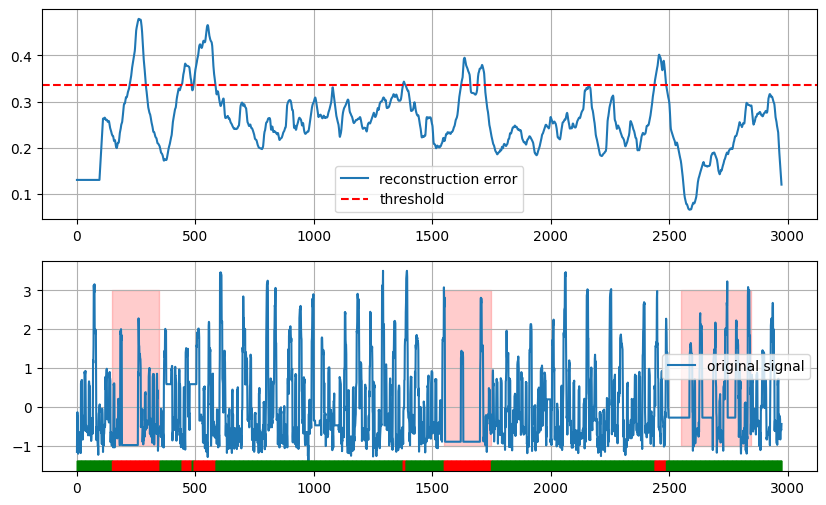

In [9]:
import matplotlib.pyplot as plt

data_len = len(train_dataloader) * config.batch_size
train_nll = np.zeros((data_len, M))

bae_ens.eval()
for i, x in enumerate(train_dataloader):
    x = x.view(config.batch_size, config.in_channel, -1)
    x = x.to(config.device)
    predictions = bae_ens.predict_stack_values(x)
    for m in range(M):
        train_nll[i*config.batch_size: (i+1)*config.batch_size, m] = torch.mean((x - predictions[m])**2, dim=(1,2)).detach().cpu().numpy()

train_nll_mean = np.mean(train_nll, axis=1)
threshold = np.percentile(train_nll_mean, 95)

filter_win = 30
recons_error_smoothed = np.convolve(error_mean, np.ones(filter_win)/filter_win, mode='same')
# recons_error_smoothed = gaussian_filter1d(error_mean, sigma=15)
prefix = np.ones(config.win_size - 1) * recons_error_smoothed[0]
recons_error_smoothed = np.concatenate((prefix, recons_error_smoothed))

# construct predict label and adjust
predict_label = np.zeros(recons_error_smoothed.shape)
predict_label[recons_error_smoothed > threshold] = 1

gd_label = np.zeros(recons_error_smoothed.shape)
for index in anomaly_index:
    gd_label[index[0]: index[1]] = 1

pred, gd = utils.adjuct_pred(predict_label, gd_label)
pred, gd = utils.adjuct_gt(pred, gd)
pred[-1] = 0 # prevent from array bounds
gd[-1] = 0
anomaly_index = utils.get_anomaly_segment(gd) 
print(anomaly_index)
for index in anomaly_index:
    gd_label[index[0]: index[1]] = 1

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
ax[0].plot(recons_error_smoothed, label='reconstruction error')
ax[0].axhline(y=threshold, color='r', linestyle='--', label='threshold')
ax[0].legend()
ax[0].grid()
ax[1].plot(test.flatten()[: len(recons_error_smoothed)], label='original signal')

for index in anomaly_index:
    ax[1].fill_between(np.arange(index[0], index[1]), -1, 3, color='red', alpha=0.2)
ax[1].grid()
ax[1].legend()

print(predict_label.shape, gd_label.shape, test.shape, recons_error_smoothed.shape)
# adjust the predict label

for idx in range(len(predict_label)):
    if pred[idx] == 1:
        ax[1].axvline(x=idx, color='r', ymin=0., ymax=0.05, linewidth=1)
    else:
        ax[1].axvline(x=idx, color='g', ymin=0., ymax=0.05, linewidth=1)


### Plot the calibration curve

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


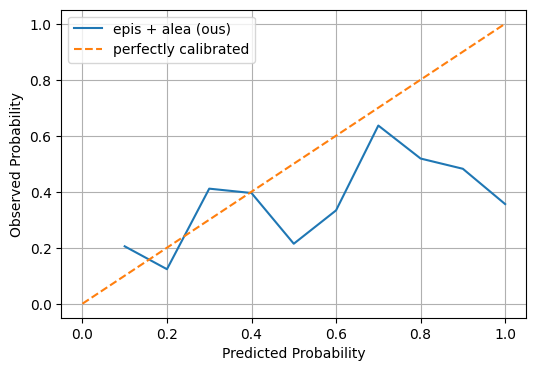

In [11]:

# expand error to the same shape as the original signal
error_of_expand = []
for i in range(M):
    prefix = np.ones(config.win_size-1) * error[0, i]
    error_of_expand.append(np.concatenate((prefix, error[:, i])))
error_of_expand = np.array(error_of_expand)

filter_win = 30
for m in range(M):
    error_of_expand[m] = np.convolve(error_of_expand[m], np.ones(filter_win)/filter_win, mode='same')

pred_prob = []
for i in range(error_of_expand.shape[1]):
    pred_i = 0
    for m in range(M):
        if error_of_expand[m, i] > threshold:
            pred_i += 1
    pred_i = pred_i / M
    pred_prob.append(pred_i)
pred_prob = np.array(pred_prob)
split_probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# split_probs = np.linspace(0, 0.5, 10)
print(split_probs)
calibration_data = []

for prob in split_probs:
    obser_num = 0
    if prob == split_probs[0]:
        idx_s = np.where((pred_prob <= prob) & (pred_prob >= 0))[0]
    else:
        idx_s = np.where((pred_prob <= prob) & (pred_prob > round(prob - 0.1, 2)))[0]
    if len(idx_s) == 0:
        calibration_data.append((prob, prob)) # if no data in the interval, the observed probability is equal to the predicted probability
        continue    
    for i in idx_s:
        if gd_label[i] == 1:
            obser_num += 1
    calibration_data.append((prob, obser_num / len(idx_s)))

# plot calibration

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
calibration_data = np.array(calibration_data)
ax.plot(calibration_data[:, 0], calibration_data[:, 1], label='epis + alea (ous)')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('Observed Probability')
ax.grid()
# ax.plot(calibration_data2[:, 0], calibration_data2[:, 1], label='epis')
ax.plot([0, 1], [0, 1], linestyle='--', label='perfectly calibrated')
ax.legend()
plt.show()

### Visualize the result in `script/run.sh`

(5, 10) (5, 10) (5, 10)


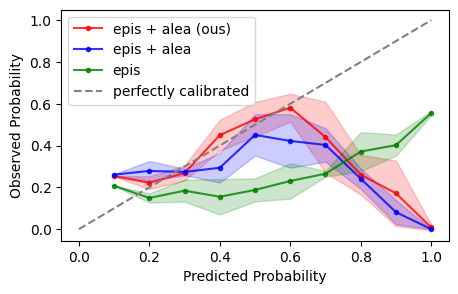

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['lines.markersize'] = 3

result_dir = '../result/calibration'
dataset = 'SMAP_P1'
ea_ous = 'epis_alea_ours'
ea = 'epis_alea'
e = 'epis'

ea_ous_obsers = [[] for i in range(5)]
ea_obsers = [[] for i in range(5)]
e_obsers = [[] for i in range(5)]
for seed in [1,2,3,4,5]:

    df_epis_alea_ours = pd.read_csv(f'{result_dir}/{dataset}_{ea_ous}_seed{seed}.csv')
    df_epis_alea = pd.read_csv(f'{result_dir}/{dataset}_{ea}_seed{seed}.csv')
    df_epis = pd.read_csv(f'{result_dir}/{dataset}_{e}_seed{seed}.csv')

    calibration_data_epis_alea_ours_pred = df_epis_alea_ours['Predicted Probability'].values
    calibration_data_epis_alea_pred = df_epis_alea['Predicted Probability'].values
    calibration_data_epis_pred = df_epis['Predicted Probability'].values


    calibration_data_epis_alea_ours_obser = df_epis_alea_ours['Observed Probability'].values
    ea_ous_obsers[seed-1].extend(calibration_data_epis_alea_ours_obser.flatten())

    
    calibration_data_epis_alea_obser = df_epis_alea['Observed Probability'].values
    ea_obsers[seed-1].extend(calibration_data_epis_alea_obser.flatten())

    calibration_data_epis_obser = df_epis['Observed Probability'].values
    e_obsers[seed-1].extend(calibration_data_epis_obser.flatten())


ea_ous_obsers = np.array(ea_ous_obsers)
ea_obsers = np.array(ea_obsers)
e_obsers = np.array(e_obsers)

print(ea_ous_obsers.shape, ea_obsers.shape, e_obsers.shape, )

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

ea_ours_obsers_upper = np.mean(ea_ous_obsers, axis=0) + 1 * np.std(ea_ous_obsers, axis=0)
ea_ours_obsers_lower = np.mean(ea_ous_obsers, axis=0) - 1 * np.std(ea_ous_obsers, axis=0)
ea_obsers_upper = np.mean(ea_obsers, axis=0) + 1 * np.std(ea_obsers, axis=0)
ea_obsers_lower = np.mean(ea_obsers, axis=0) - 1 * np.std(ea_obsers, axis=0)
e_obsers_upper = np.mean(e_obsers, axis=0) + 1 * np.std(e_obsers, axis=0)
e_obsers_lower = np.mean(e_obsers, axis=0) - 1 * np.std(e_obsers, axis=0)

ax.fill_between(calibration_data_epis_alea_ours_pred, ea_ours_obsers_upper, ea_ours_obsers_lower, color='red', alpha=0.2)
ax.fill_between(calibration_data_epis_alea_pred, ea_obsers_upper, ea_obsers_lower, color='blue', alpha=0.2)
ax.fill_between(calibration_data_epis_pred, e_obsers_upper, e_obsers_lower, color='green', alpha=0.2)

ax.plot(calibration_data_epis_alea_ours_pred, np.mean(ea_ous_obsers, axis=0), color='red', alpha=0.8, label='epis + alea (ous)', marker='o', linestyle='-')
ax.plot(calibration_data_epis_alea_pred, np.mean(ea_obsers, axis=0), color='blue', alpha=0.8, label='epis + alea', marker='o', linestyle='-')
ax.plot(calibration_data_epis_pred, np.mean(e_obsers, axis=0),color='green', alpha=0.8, label='epis', marker='o', linestyle='-')

ax.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=1, label='perfectly calibrated')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('Observed Probability')
ax.legend()
plt.show()
